In [58]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal
import modules.anal_func as anal_func
import astropy.units as u
from astropy.cosmology import LambdaCDM

cosmo = LambdaCDM(H0 = 68, Om0= 0.3, Ode0= 0.7, Ob0=0.048)


In [59]:
snap = 104
n = 60
sb = anal.Simba('cis', size='50_full')
z = sb.get_z_from_snap(snap)
print(f'Snap {snap} is at z={z}')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)
print(snapfile)

Snap 104 is at z=1.022199708398802
/mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full/snap_m50n512_104.hdf5


In [60]:
cs = sb.get_caesar(snap)
pos = np.asarray([i.pos for i in cs.galaxies])
ids  = np.asarray([i.GroupID for i in cs.galaxies])
m = np.asarray([i.masses['stellar'] for i in cs.galaxies])

yt : [INFO     ] 2024-10-26 17:41:53,084 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full//Groups/m50n512_104.hdf5
yt : [INFO     ] 2024-10-26 17:41:53,884 Found 66167 halos
yt : [INFO     ] 2024-10-26 17:41:55,902 Found 4868 galaxies


In [61]:
h = cs.simulation.scale_factor
merg_id = {}
for g in range(len(pos)):
    this = pos[g]
    d = np.sqrt((pos[:,0]*h-pos[:,0][g]*h)**2+(pos[:,1]*h-pos[:,1][g]*h)**2+(pos[:,2]*h-pos[:,2][g]*h)**2)
    mk = np.all([d>0, d<30], axis=0)
    for i in ids[mk]:
        if i not in merg_id and m[i]>1e10 and m[ids[g]]>1e10:
            merg_id[ids[g]]=i
    
    
    

In [62]:
merg_id

{41: 629, 279: 609, 637: 835}

yt : [INFO     ] 2024-10-26 17:44:41,528 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-26 17:44:41,541 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-26 17:44:41,542 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-26 17:44:41,633 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-26 17:44:41,634 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-26 17:44:41,635 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-26 17:44:41,636 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-26 17:44:41,637 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-26 17:44:41,640 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-26 17:44:41,640 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-26 17:44:41,641 Parame

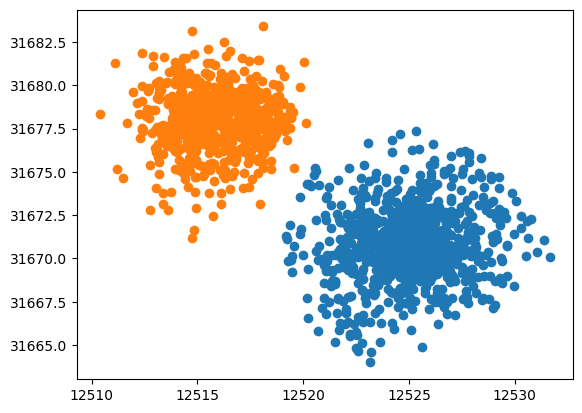

In [67]:
g1 = 637
g2 = 835
gal1 = [i for i in cs.galaxies][g1]
gal2 = [i for i in cs.galaxies][g2]
ds = yt.load(snapfile)
ad = ds.all_data()
pos = ad['PartType4', 'Coordinates'][gal1.slist].in_units('kpc').value
plt.scatter(pos[:, 0], pos[:, 2])
pos = ad['PartType4', 'Coordinates'][gal2.slist].in_units('kpc').value
plt.scatter(pos[:, 0], pos[:, 2])

In [68]:
sfr1 = [i.sfr for i in cs.galaxies][g1]
sfr2 = [i.sfr for i in cs.galaxies][g2]
m1 = [i.masses['stellar'] for i in cs.galaxies][g1]
m2 = [i.masses['stellar'] for i in cs.galaxies][g2]
fedd1 = [i.bh_fedd for i in cs.galaxies][g1]
fedd2 = [i.bh_fedd for i in cs.galaxies][g2]
mbh1 = [i.masses['bh'] for i in cs.galaxies][g1]
mbh2 = [i.masses['bh'] for i in cs.galaxies][g2]
print(fedd1, mbh1)
print(fedd2, mbh2)
print(sfr1/m1, sfr2/m2)
print(0.2/cosmo.age(z).to(u.yr).value)

0.015973297812254334 dimensionless 66960480.0 Msun
0.03621122132327407 dimensionless 8121503.5 Msun
3.5069469858973756e-10 1/yr 1.2265982168119444e-09 1/yr
3.429803456369696e-11
